This notebook shows you how to deal with las file

In [1]:
#pip install lasio
import lasio
file_name = "caliper.las"
las = lasio.read(file_name)

In [2]:
# view the version of the las file
las.version

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH STE")]

In [3]:
header = las.well
for h in header:
    print("Property: ",h["mnemonic"], "  Unit= ", h["unit"])

Property:  STRT   Unit=  M
Property:  STOP   Unit=  M
Property:  STEP   Unit=  M
Property:  NULL   Unit=  
Property:  COMP   Unit=  
Property:  WELL   Unit=  
Property:  FLD   Unit=  
Property:  LOC   Unit=  
Property:  SRVC   Unit=  
Property:  STAT   Unit=  
Property:  CNTY   Unit=  
Property:  DATE   Unit=  
Property:  API   Unit=  
Property:  BIT   Unit=  IN


In [4]:
# Curves..
curves = las.curves

for c in curves:
    print("Curve Name =", c["mnemonic"])
    print(c.data)

Curve Name = DEPT
[100.  100.1 100.2 100.3 100.4 100.5 100.6 100.7 100.8 100.9 101.  101.1
 101.2 101.3 101.4 101.5 101.6 101.7 101.8 101.9 102.  102.1 102.2 102.3
 102.4 102.5 102.6 102.7 102.8 102.9 103.  103.1 103.2 103.3 103.4 103.5
 103.6 103.7 103.8 103.9 104.  104.1 104.2 104.3 104.4 104.5 104.6 104.7
 104.8 104.9 105.  105.1 105.2 105.3 105.4 105.5 105.6 105.7 105.8 105.9
 106.  106.1 106.2 106.3 106.4 106.5 106.6 106.7 106.8 106.9 107.  107.1
 107.2 107.3 107.4 107.5 107.6 107.7 107.8 107.9 108.  108.1 108.2 108.3
 108.4 108.5 108.6 108.7 108.8 108.9 109.  109.1 109.2 109.3 109.4 109.5
 109.6 109.7 109.8 109.9 110.  110.1 110.2 110.3 110.4 110.5 110.6 110.7
 110.8 110.9 111.  111.1 111.2 111.3 111.4 111.5 111.6 111.7 111.8 111.9
 112.  112.1 112.2 112.3 112.4 112.5 112.6 112.7 112.8 112.9 113.  113.1
 113.2 113.3 113.4 113.5 113.6 113.7 113.8 113.9 114.  114.1 114.2 114.3
 114.4 114.5 114.6 114.7 114.8 114.9 115.  115.1 115.2 115.3 115.4 115.5
 115.6 115.7 115.8 115.9 116.  11

In [5]:
df  = las.df()
# lets reset the index...
df.reset_index(inplace=True)
df

,DEPT,CAL,DENS,GR,DTP
0,100.0,119.430,2.339,91.644,98.1
1,100.1,119.415,2.409,81.874,102.6
2,100.2,119.384,2.385,57.839,101.7
3,100.3,119.404,2.447,93.504,98.4
4,100.4,119.426,2.416,106.375,91.2
...,...,...,...,...,...
496,149.6,117.040,2.383,56.133,87.3
497,149.7,116.704,2.400,67.298,87.3
498,149.8,116.718,2.363,74.431,87.9
499,149.9,116.803,2.441,94.590,89.1


In [6]:
df.describe()
#Describe statistical informatino about the log file.

,DEPT,CAL,DENS,GR,DTP
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,125.000000,118.938619,2.296930,83.617124,99.064790
std,14.477051,2.439635,0.292073,26.557737,15.242224
min,100.000000,115.827000,1.258000,10.544000,64.800000
25%,112.500000,117.068000,2.351000,65.437000,87.000000
50%,125.000000,118.806000,2.390000,82.650000,98.400000
75%,137.500000,119.889000,2.420000,99.707000,106.500000
max,150.000000,146.533000,2.576000,159.097000,147.900000


In [7]:
df.describe().T
# trasnposing the description...

,count,mean,std,min,25%,50%,75%,max
DEPT,501.0,125.000000,14.477051,100.000,112.500,125.000,137.500,150.000
CAL,501.0,118.938619,2.439635,115.827,117.068,118.806,119.889,146.533
DENS,501.0,2.296930,0.292073,1.258,2.351,2.390,2.420,2.576
GR,501.0,83.617124,26.557737,10.544,65.437,82.650,99.707,159.097
DTP,501.0,99.064790,15.242224,64.800,87.000,98.400,106.500,147.900


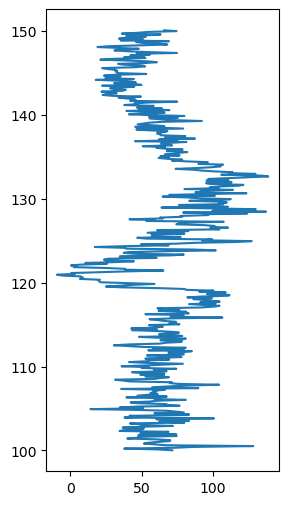

In [8]:
# lets plot the las file
import matplotlib.pyplot as plt
plt.figure(figsize=(3,6))
# accessing depth
depth = las.depth_m
depth = las["DEPT"]
depth = las.curves["DEPT"]
plt.plot(las["GR"]-20, las.depth_ft /3.28 )

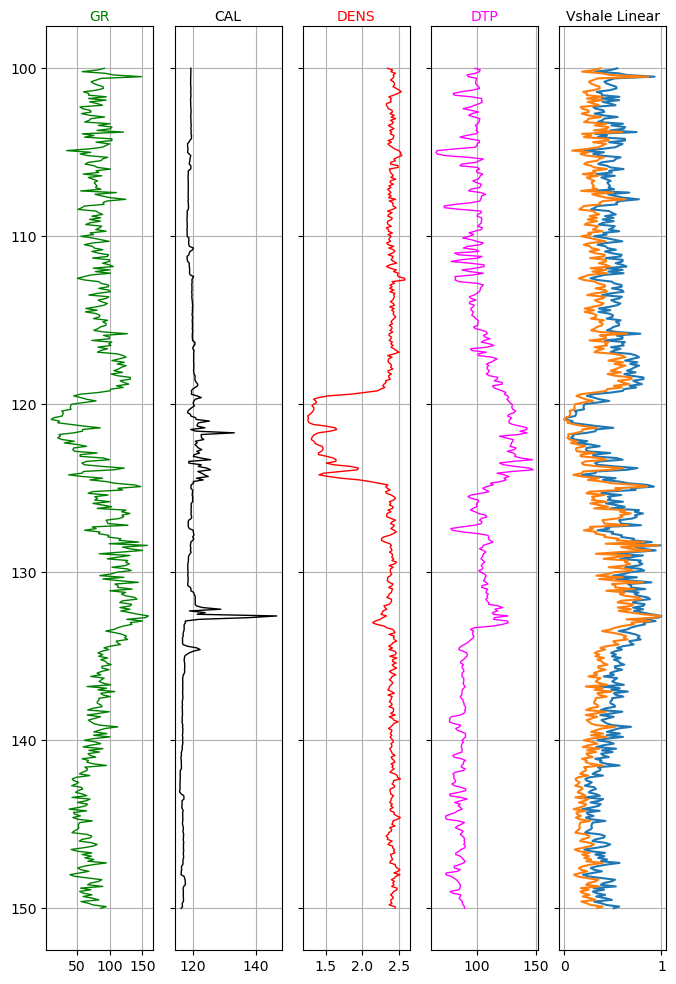

In [9]:

# creating actual well log plots.
import matplotlib.pyplot as plt
import numpy
fig, ax =  plt.subplots(nrows=1, ncols=5,figsize=(8,12), sharey=True)
to_plot_list = ["GR",    "CAL",  "DENS",  "DTP"]
color_list =       ["green", "black","red", "magenta"]

for var in to_plot_list:
    index = to_plot_list.index(var)
    # do plotting
    c = color_list[index]
    ax[index].plot(las[var], las.depth_m, color = c , lw = 1, ls="solid")
    # lw = line width , pixels
    # ls = line style    --,   ..,  solid
    ax[index].set_xlabel(var, color=c)
    ax[index].xaxis.set_label_position("top")
    ax[index].grid()

# vshale = gr - min_gr /  (max_gr- min_gr)  
min_gr = las["GR"].min()
max_gr = las["GR"].max()
mean_gr = las["GR"].mean()
#calculate Vshale using 2 different methods
las["Vshale"] = (las["GR"] - min_gr)/(max_gr - min_gr)

las["Vshale-Larionov"] = 0.33 * ( (2**(2 * las["Vshale"])) -1)

ax[4].plot(las["Vshale"], las.depth_m)
ax[4].plot(las["Vshale-Larionov"], las.depth_m)

ax[4].set_xlabel("Vshale Linear")
ax[4].xaxis.set_label_position("top")
ax[4].grid()
ax[0].invert_yaxis()
fig.savefig("simple_logfile.pdf")